In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
data = pd.read_csv("/content/kidney_disease.csv")

In [4]:
print(data)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [5]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [7]:
categorical_features = [col for col in data.columns if data[col].dtype == 'object']

Non-numeric columns: Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')
Accuracy: 0.9875
Precision: 1.0
Recall: 0.9807692307692307
F1-score: 0.9902912621359222
Confusion Matrix:
 [[51  1]
 [ 0 28]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


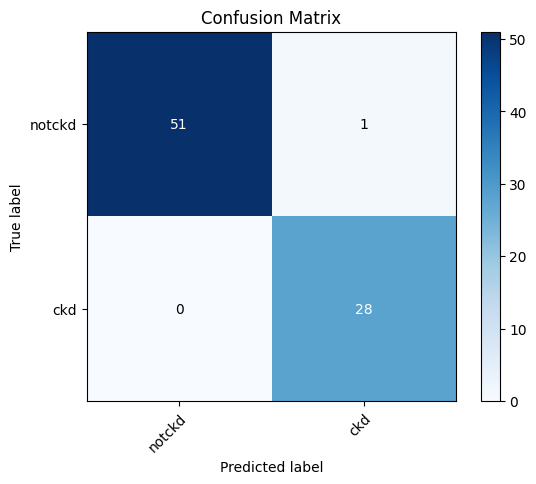

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('/content/kidney_disease.csv')

# Separate features and target variable
X = data.drop('classification', axis=1)
y = data['classification']

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Encode non-numeric columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='ckd')

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='ckd')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='ckd')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['notckd', 'ckd'],  # Replace with your class labels
       yticklabels=['notckd', 'ckd'],
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()


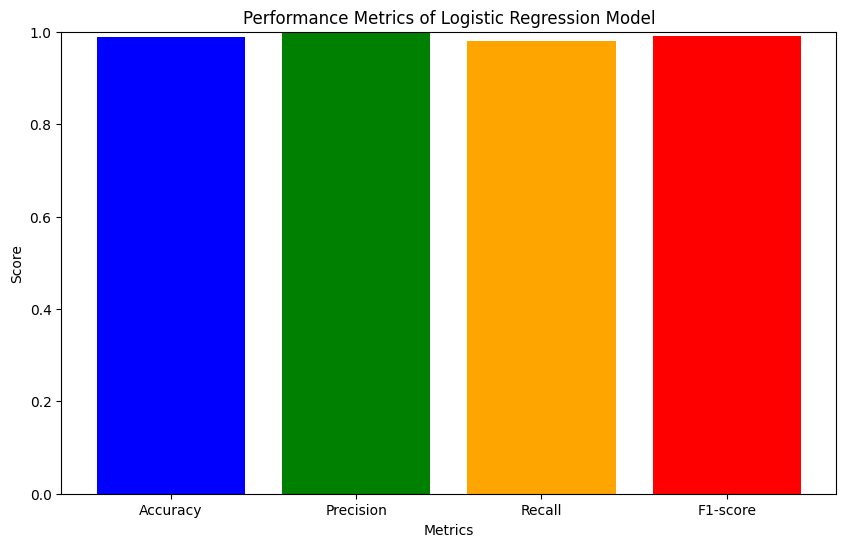

In [9]:
import matplotlib.pyplot as plt

# Metrics values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics of Logistic Regression Model')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for scores
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


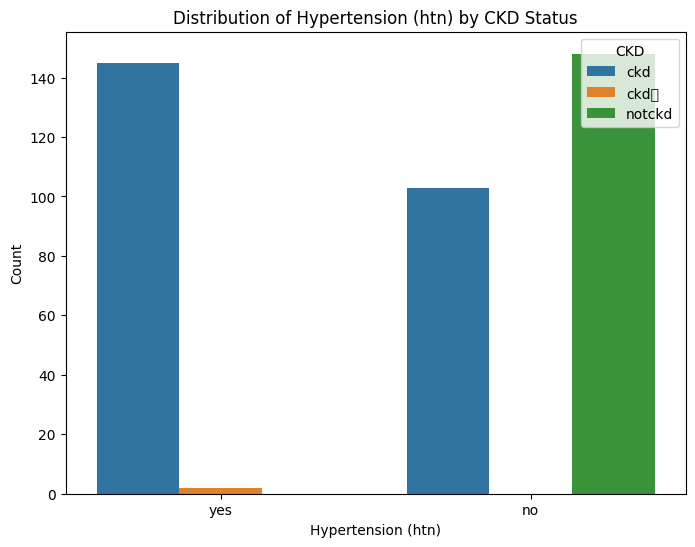

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/kidney_disease.csv')

# Bar Plot for 'htn' feature
plt.figure(figsize=(8, 6))
sns.countplot(x='htn', hue='classification', data=data)
plt.title('Distribution of Hypertension (htn) by CKD Status')
plt.xlabel('Hypertension (htn)')
plt.ylabel('Count')
plt.legend(title='CKD', loc='upper right')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


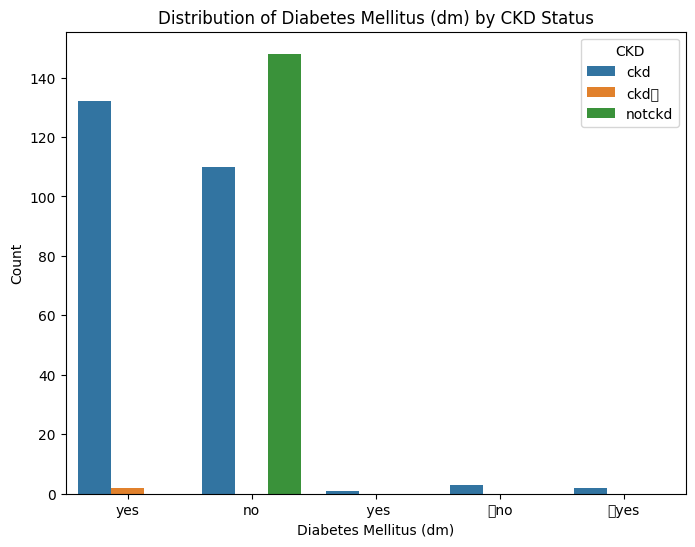

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


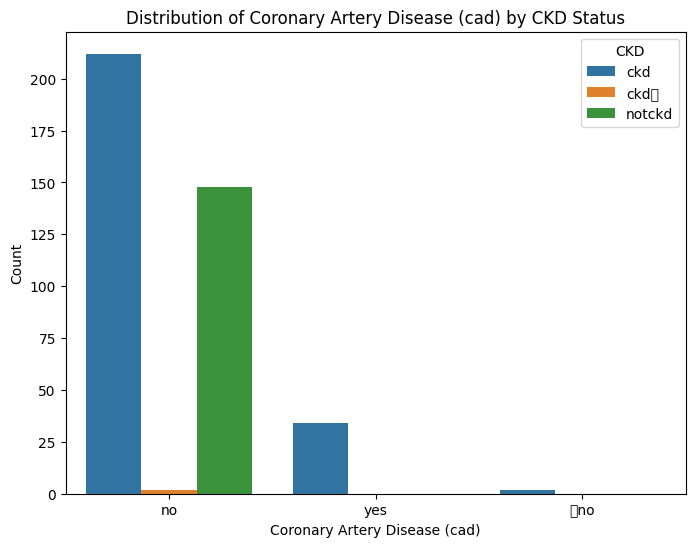

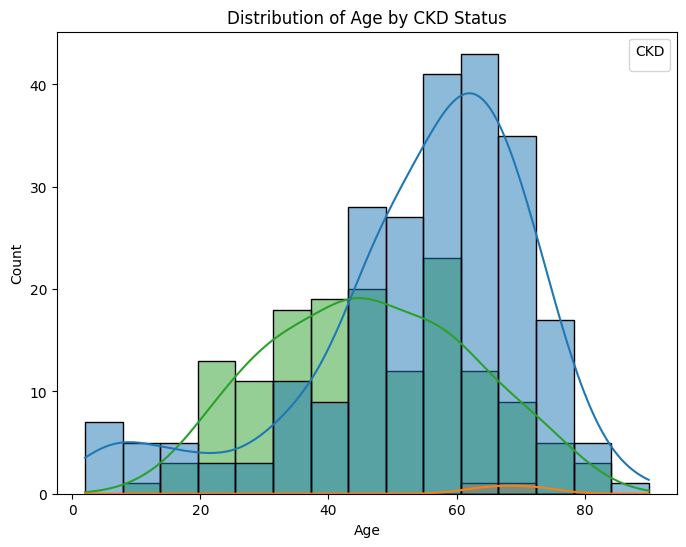

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


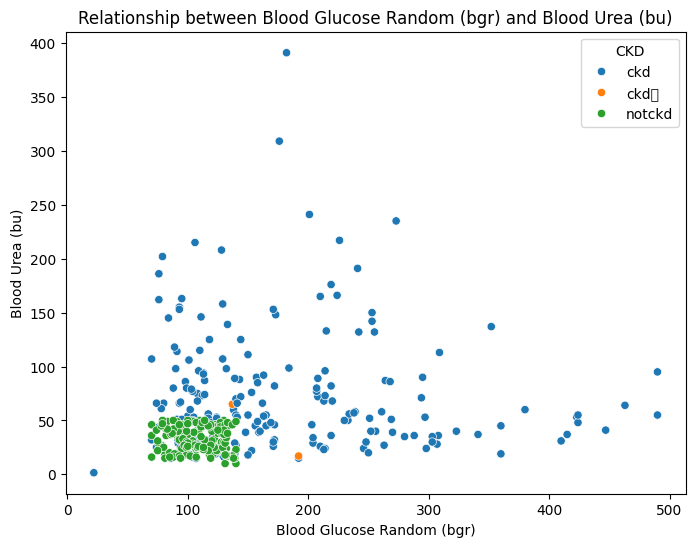

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/kidney_disease.csv')

# Bar Plot for 'dm' feature
plt.figure(figsize=(8, 6))
sns.countplot(x='dm', hue='classification', data=data)
plt.title('Distribution of Diabetes Mellitus (dm) by CKD Status')
plt.xlabel('Diabetes Mellitus (dm)')
plt.ylabel('Count')
plt.legend(title='CKD', loc='upper right')
plt.show()

# Bar Plot for 'cad' feature
plt.figure(figsize=(8, 6))
sns.countplot(x='cad', hue='classification', data=data)
plt.title('Distribution of Coronary Artery Disease (cad) by CKD Status')
plt.xlabel('Coronary Artery Disease (cad)')
plt.ylabel('Count')
plt.legend(title='CKD', loc='upper right')
plt.show()

# Histogram for 'age' feature
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='age', hue='classification', kde=True)
plt.title('Distribution of Age by CKD Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='CKD', loc='upper right')
plt.show()

# Scatter Plot for 'bgr' and 'bu' features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bgr', y='bu', hue='classification', data=data)
plt.title('Relationship between Blood Glucose Random (bgr) and Blood Urea (bu)')
plt.xlabel('Blood Glucose Random (bgr)')
plt.ylabel('Blood Urea (bu)')
plt.legend(title='CKD', loc='upper right')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


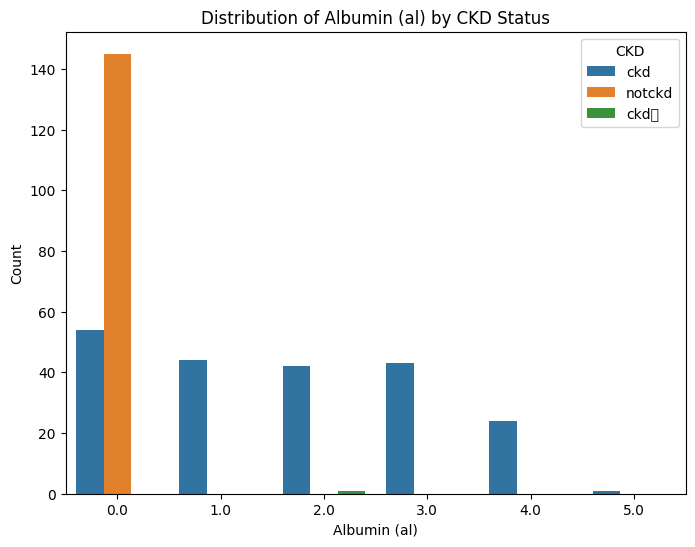

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


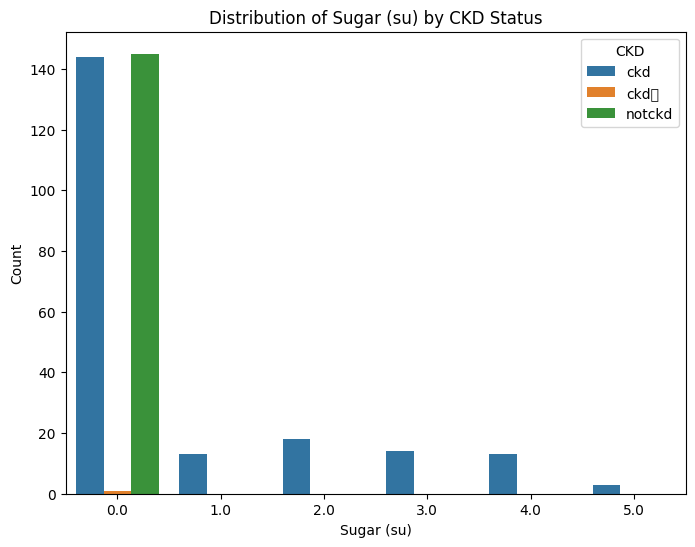

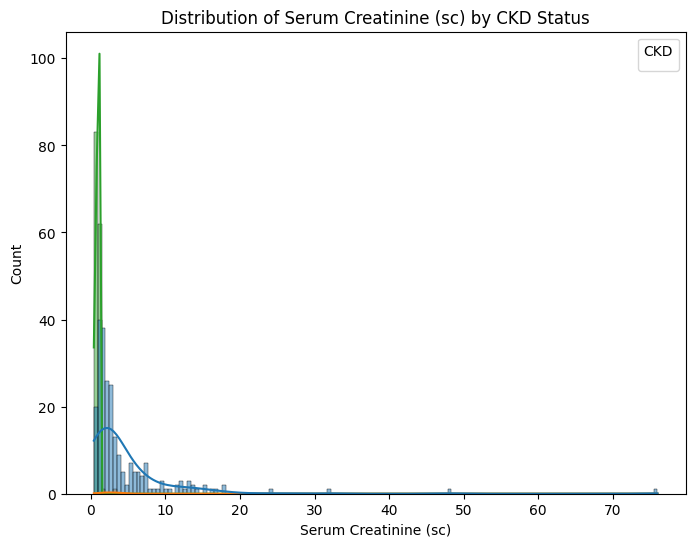

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


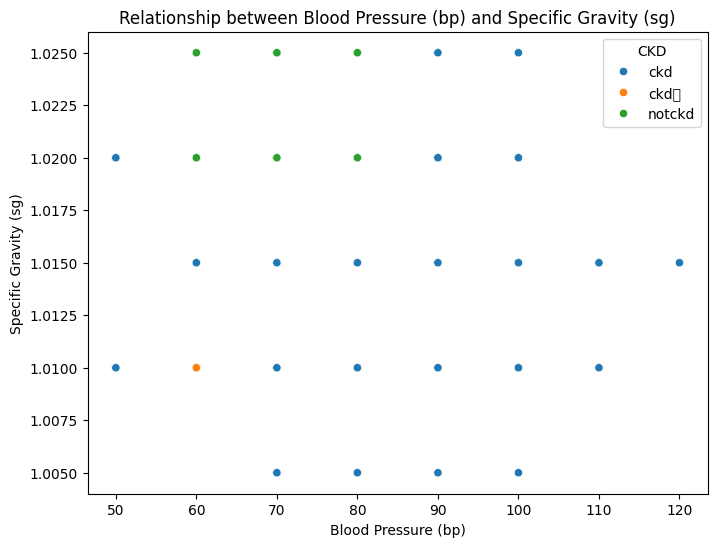

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/kidney_disease.csv')

# Bar Plot for 'al' feature
plt.figure(figsize=(8, 6))
sns.countplot(x='al', hue='classification', data=data)
plt.title('Distribution of Albumin (al) by CKD Status')
plt.xlabel('Albumin (al)')
plt.ylabel('Count')
plt.legend(title='CKD', loc='upper right')
plt.show()

# Bar Plot for 'su' feature
plt.figure(figsize=(8, 6))
sns.countplot(x='su', hue='classification', data=data)
plt.title('Distribution of Sugar (su) by CKD Status')
plt.xlabel('Sugar (su)')
plt.ylabel('Count')
plt.legend(title='CKD', loc='upper right')
plt.show()

# Histogram for 'sc' feature
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='sc', hue='classification', kde=True)
plt.title('Distribution of Serum Creatinine (sc) by CKD Status')
plt.xlabel('Serum Creatinine (sc)')
plt.ylabel('Count')
plt.legend(title='CKD', loc='upper right')
plt.show()

# Scatter Plot for 'bp' and 'sg' features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bp', y='sg', hue='classification', data=data)
plt.title('Relationship between Blood Pressure (bp) and Specific Gravity (sg)')
plt.xlabel('Blood Pressure (bp)')
plt.ylabel('Specific Gravity (sg)')
plt.legend(title='CKD', loc='upper right')
plt.show()


Non-numeric columns: Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')
Accuracy: 0.9875
Precision: 1.0
Recall: 0.9807692307692307
F1-score: 0.9902912621359222
Confusion Matrix:
 [[51  1]
 [ 0 28]]


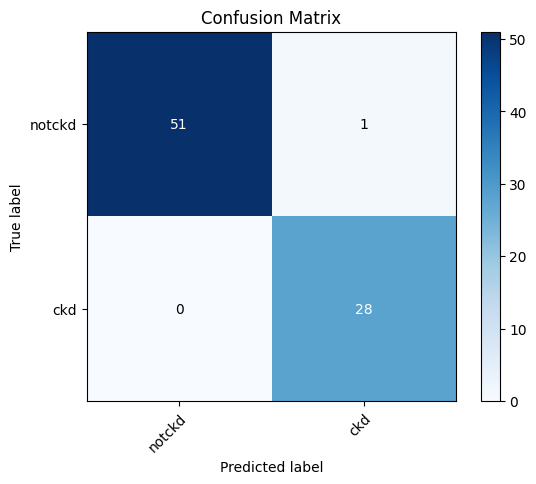

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('/content/kidney_disease.csv')

# Separate features and target variable
X = data.drop('classification', axis=1)
y = data['classification']

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Encode non-numeric columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='ckd')

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='ckd')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='ckd')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['notckd', 'ckd'],  # Replace with your class labels
       yticklabels=['notckd', 'ckd'],
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



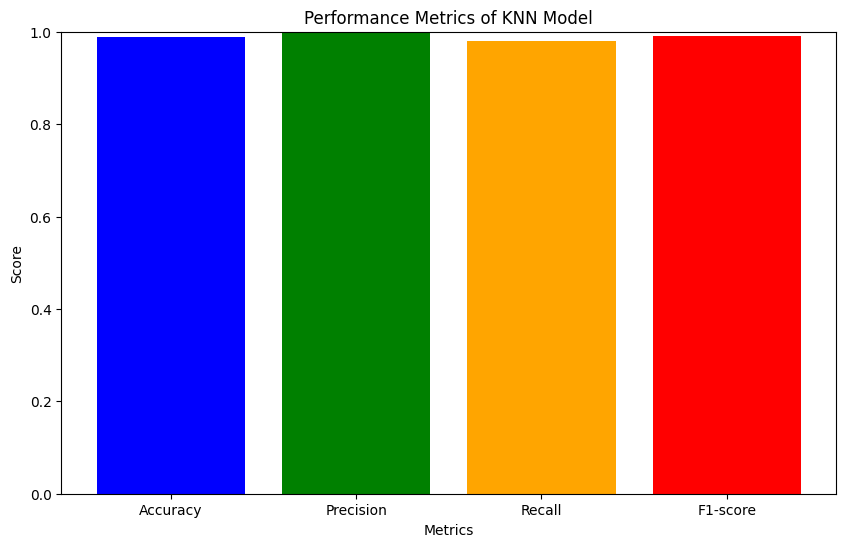

In [15]:
import matplotlib.pyplot as plt

# Metrics values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics of KNN Model')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for scores
plt.show()


Accuracy: 0.99167
Precision: 0.99177
Recall: 0.99167
F1-score: 0.99165


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


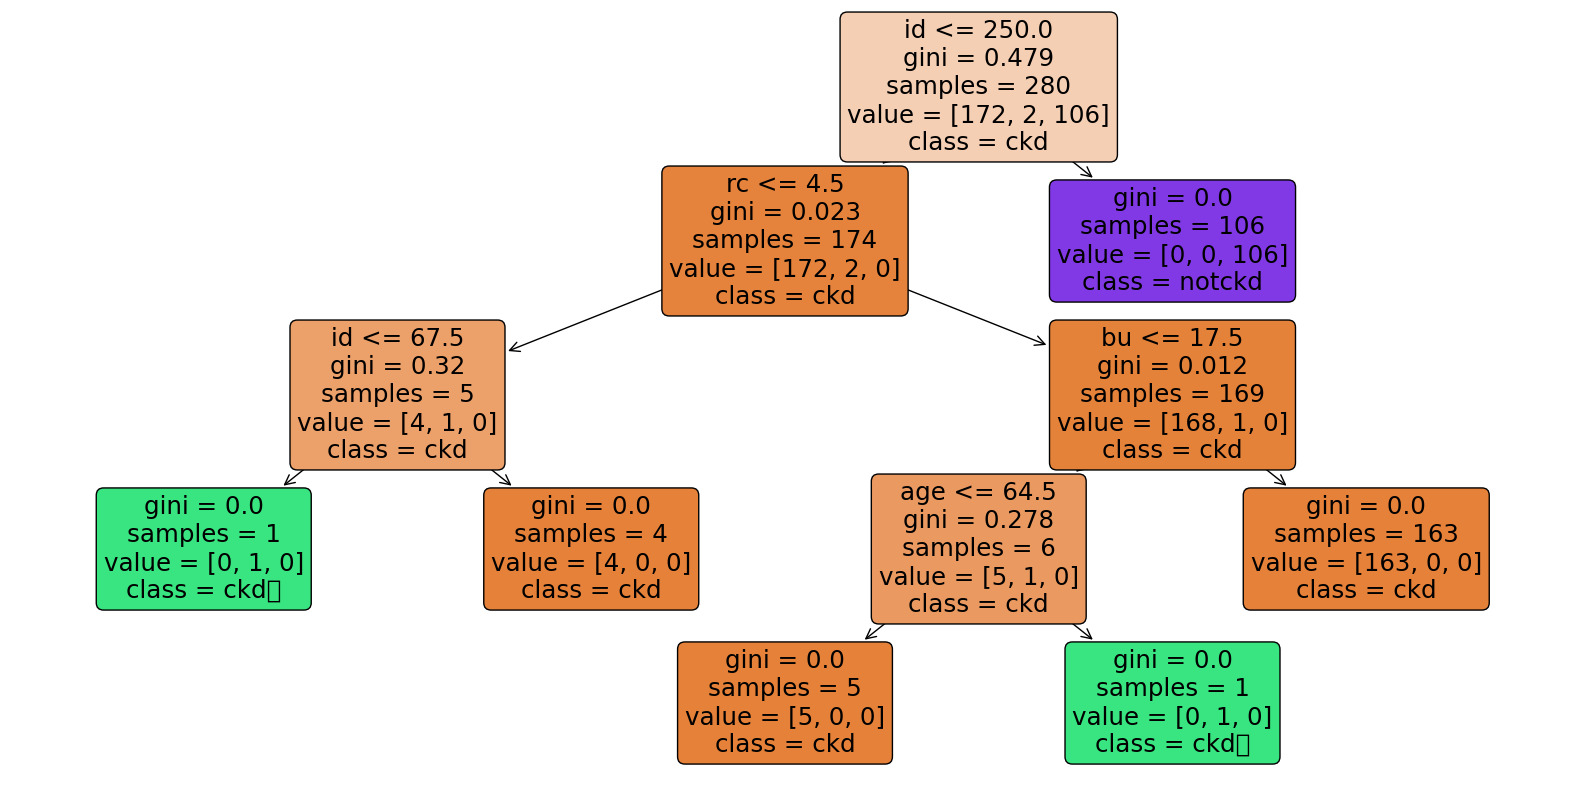

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/kidney_disease.csv')

# Separate features and target variable
X = data.drop('classification', axis=1)
y = data['classification']

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Encode non-numeric columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# Determine the number of classes in the data
unique_classes = np.unique(y)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-score: {f1:.5f}")

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=data.columns[:-1], class_names=unique_classes, rounded=True)
plt.show()



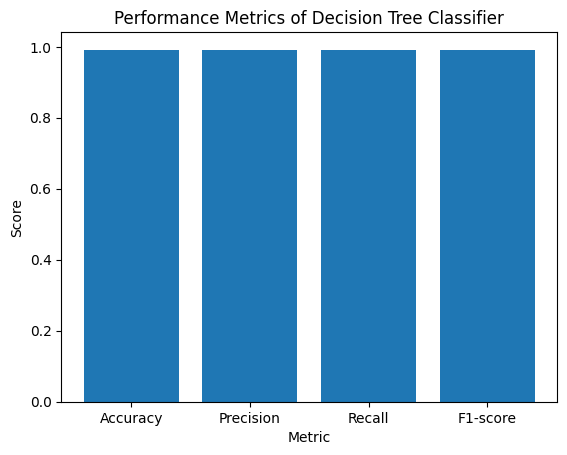

In [17]:
import matplotlib.pyplot as plt

# Define the data to plot
data = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Define the x-axis labels
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create a bar graph
plt.bar(labels, data.values())

# Add a title and labels
plt.title('Performance Metrics of Decision Tree Classifier')
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()


Non-numeric columns: Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')
Accuracy: 0.9833333333333333
Precision: 1.0
Recall: 0.9736842105263158
F1-score: 0.9866666666666666
Confusion Matrix:
 [[74  2]
 [ 0 44]]


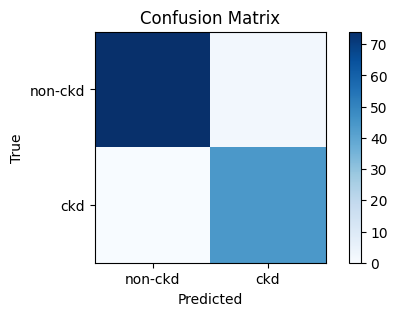

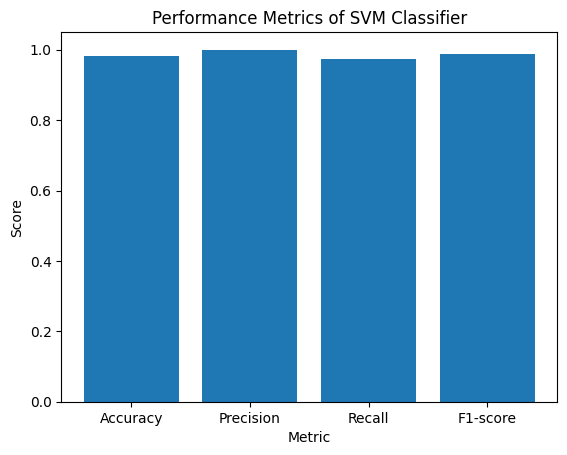

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/kidney_disease.csv')

# Separate features and target variable
X = data.drop('classification', axis=1)
y = data['classification']

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Encode non-numeric columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the SVM classifier
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='ckd')

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='ckd')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='ckd')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 3))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.xticks([0, 1], ['non-ckd', 'ckd'])
plt.yticks([0, 1], ['non-ckd', 'ckd'])
plt.show()

# Define the data to plot
data = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Define the x-axis labels
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create a bar graph
plt.bar(labels, data.values())

# Add a title and labels
plt.title('Performance Metrics of SVM Classifier')
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()

Non-numeric columns: Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')
Accuracy: 0.9916666666666667
Precision: 0.987012987012987
Recall: 1.0
F1-score: 0.9934640522875817
Confusion Matrix:
 [[76  0]
 [ 1 43]]


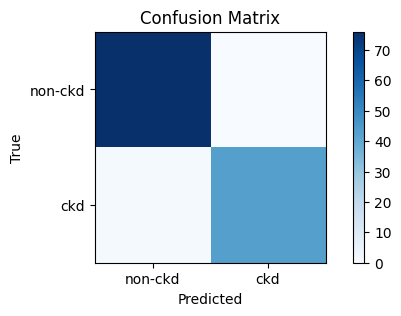

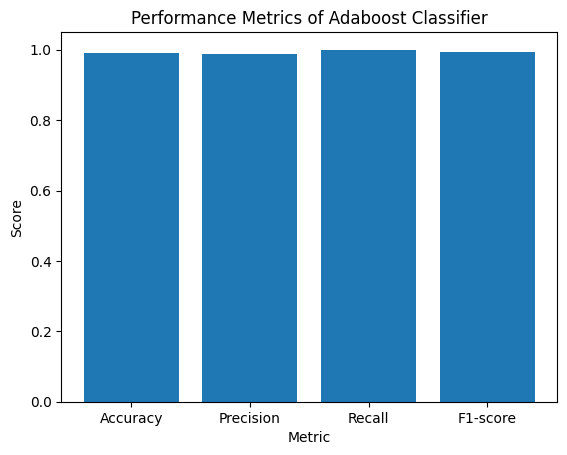

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/kidney_disease.csv')

# Separate features and target variable
X = data.drop('classification', axis=1)
y = data['classification']

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Encode non-numeric columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Adaboost classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='ckd')

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='ckd')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='ckd')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(7, 3))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.xticks([0, 1], ['non-ckd', 'ckd'])
plt.yticks([0, 1], ['non-ckd', 'ckd'])
plt.show()

# Plot the bar graph for accuracy, precision, recall, and F1-score
import matplotlib.pyplot as plt

# Define the data to plot
data = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Define the x-axis labels
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create a bar graph
plt.bar(labels, data.values())

# Add a title and labels
plt.title('Performance Metrics of Adaboost Classifier')
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()

Non-numeric columns: Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9958333333333333
Precision: 0.6644736842105263
Recall: 0.6666666666666666
F1-score: 0.6655665566556656
Confusion Matrix:
 [[151   0   0]
 [  1   0   0]
 [  0   0  88]]


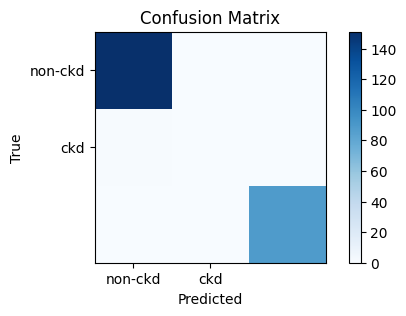

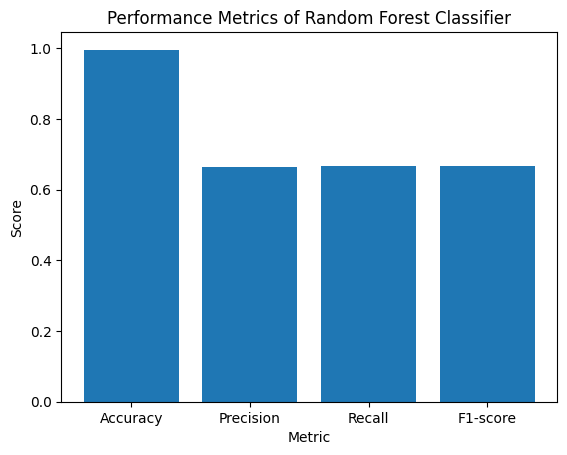

Accuracy on modified test set: 0.9833333333333333


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/kidney_disease.csv')

# Separate features and target variable
X = data.drop('classification', axis=1)
y = data['classification']

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Encode non-numeric columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='macro')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 3))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.xticks([0, 1], ['non-ckd', 'ckd'])
plt.yticks([0, 1], ['non-ckd', 'ckd'])
plt.show()

# Plot the bar graph for accuracy, precision, recall, and F1-score
import matplotlib.pyplot as plt

# Define the data to plot
data = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Define the x-axis labels
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create a bar graph
plt.bar(labels, data.values())

# Add a title and labels
plt.title('Performance Metrics of Random Forest Classifier')
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()

# Modify the test set to include some misclassified samples
X_test_modified = X_test.copy()
X_test_modified[0:5, :] = X_train[0:5, :]

# Make predictions on the modified test set
y_pred_modified = rf_model.predict(X_test_modified)

# Calculate accuracy on the modified test set
accuracy_modified = accuracy_score(y_test, y_pred_modified)

print("Accuracy on modified test set:", accuracy_modified)


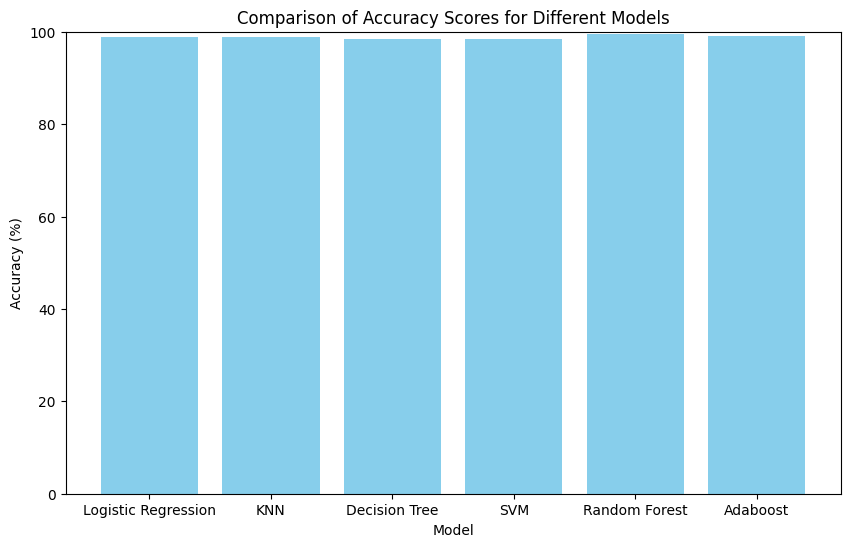

In [21]:
import matplotlib.pyplot as plt

# Define the models and their accuracy scores
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest', 'Adaboost']
accuracies = [98.75, 98.76 ,98.33 , 98.33, 99.58, 99.16]  # Replace with the actual accuracy scores from the sources

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy Scores for Different Models')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100 for percentage

# Display the graph
plt.show()